# Weight-Cut Graphs of Robotic Frames Similarities

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import string
import random
import itertools as it
import math
import matplotlib.pyplot as plt
from pylab import hist
import numpy as np
import operator
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 

import community
# import jgraph as igraph
import leidenalg
import igraph as ig
# import oslom

In [2]:
df = pd.read_csv("/Volumes/2 TB Seagate Bac/Data_etc/Robotics_Vassia/ROBOTICS_DATA/MINNIE/minnie.csv", dtype='unicode')
print "Number of rows =", len(df)
df.head(10)

Number of rows = 418155


,Node1,Node2,Weight
0,0,1,403
1,0,2,396
2,0,3,381
3,0,4,365
4,0,5,355
5,0,6,346
6,0,7,337
7,0,8,331
8,0,9,325
9,0,10,316


In [3]:
# import time
# start = time.clock()

# eds=[]
# for i in range(len(df)):
#     a=df.iloc[i]["Node1"]
#     b=df.iloc[i]["Node2"]
#     c=df.iloc[i]["Weight"]
#     eds.append((int(a),int(b),int(c)))
# print len(eds)

# G = nx.Graph()
# G.add_weighted_edges_from(eds)
# G.remove_edges_from([e for e in G.edges(data=True) if e[2]['weight']==0])

# n=len(G.nodes())
# m=len(G.edges())
# print "The graph of robotic data has %i nodes and %i edges" %(n,m) 
# if n*(n-1)/2.==float(m):
#     print "This graph is complete"
# else:
#     print "This graph is not complete"
#     if nx.is_connected(G)==True:
#         print "This graph is connected"
#     else:
#         print "This is not connected and the number of connected components =", nx.number_connected_components(G)

# nx.write_gpickle(G, "minnie.gpickle")
        
# print "computed in",time.clock() - start #4.62 mins

In [4]:
G = nx.read_gpickle("minnie.gpickle")

gedges=G.edges(data=True)
n=len(G.nodes())
m=len(G.edges())
giant = max(nx.connected_component_subgraphs(G), key=len)
print "The graph of minnie data has %i nodes and %i edges" %(n,m) 
if n*(n-1)/2.==float(m):
    print "This graph is complete"
else:
    print "This graph is not complete"
    if nx.is_connected(G)==True:
        print "This graph is connected"
    else:
        print "This is not connected and the number of connected components =", nx.number_connected_components(G)
        print "The giant conected component of this graph has %i nodes and %i edges" %(len(giant.nodes()),len(giant.edges()))

The graph of minnie data has 915 nodes and 418155 edges
This graph is complete


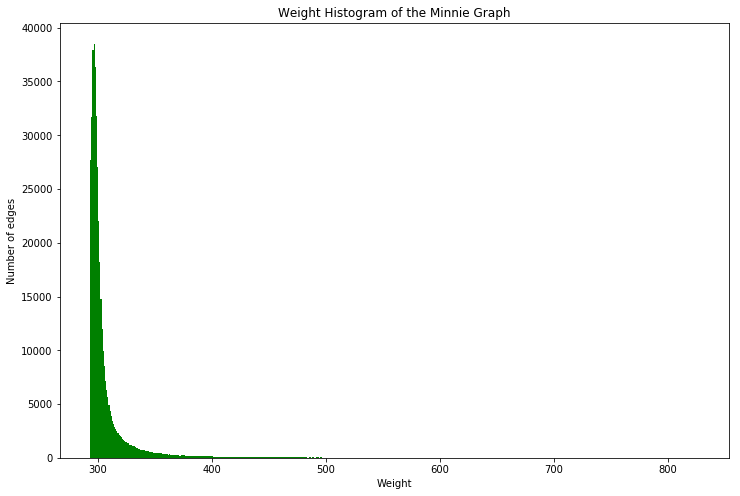

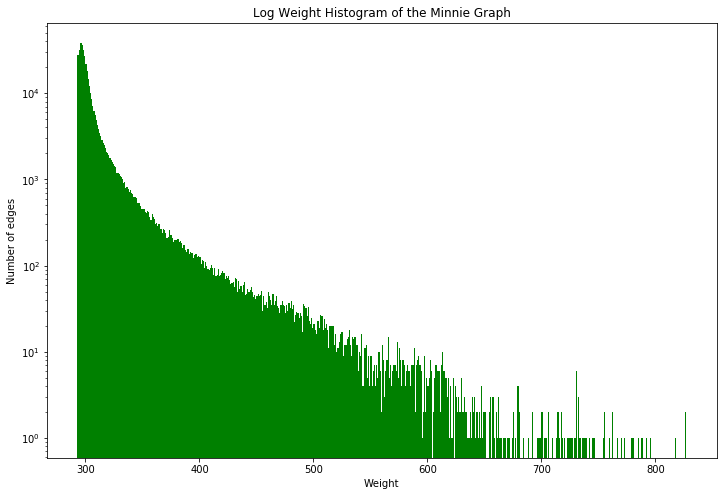

In [5]:
ds=[e[2]['weight'] for e in G.edges(data=True)]
# ds=dict(G.degree(G.nodes())).values()
bins=534 #25

plt.figure(figsize=(12,8))
# plt.subplot(121)
plt.xlabel("Weight");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of edges");
plt.title('Weight Histogram of the Minnie Graph');

plt.figure(figsize=(12,8))
# plt.subplot(122)
plt.xlabel("Weight");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of edges");
plt.title('Log Weight Histogram of the Minnie Graph');

In [6]:
print min(ds), max(ds)
print max(ds)-min(ds)

293 827
534


In [7]:
k=20
intervals_of_weights=[]
w=range(293,827,k)
for i in range(len(w)-1):
    bin=range(w[i],w[i+1])
    intervals_of_weights.append(bin)
# intervals_of_weights

In [ ]:
GG={}
for i,j in list(enumerate(intervals_of_weights)):
    ieds=[]
    for e in G.edges(data=True):
        if e[2]['weight'] in j:
            ieds.append(e)
    Ginterval = nx.Graph()
    Ginterval.add_weighted_edges_from(ieds)
    GG[i]=Ginterval

In [ ]:
for i in range(len(intervals_of_weights)):
    n=len(GG[i].nodes())
    m=len(GG[i].edges())
    print "The weight-cut graph",i,"has",n,"nodes and",m,"edges."
    if n*(n-1)/2.==float(m):
        print "This graph is complete."
    else:
        print "This graph is not complete."
    if nx.is_connected(GG[i])==True:
        print "This graph is connected."
        if nx.is_tree(GG[i])==True:
            print "This graph is a tree."
        else:
            print "This graph is not a tree."
    else:
        print "This graph is not connected."
        if nx.is_forest(GG[i])==True:
            print "This graph is a forest."
        else:
            print "This graph is not a forest."
    print

In [ ]:
for i,j in list(enumerate(intervals_of_weights)):
    if i==15:
        print j

In [ ]:
i=12
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=13
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=14
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=15
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=16
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=17
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=18
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=19
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=20
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=21
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=22
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=23
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=24
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
i=25
G=GG[i]
print sorted(G.nodes())

elabels = nx.get_edge_attributes(G,'weight')
eelabels={}
for k,v in elabels.items():
    eelabels[k]=v.values()[0]

# print eelabels
# edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[e[2]['weight'].values()[0] for e in G.edges(data=True)]
# edge_width
edge_width=[math.log(w) for w in edge_width] #0.01*
# print edge_width
# elabels=edge_width

figsize=(12,12)
pos=graphviz_layout(G) #nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=800)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=eelabels);
sst="The graph of frames having similarities in the interval [%i,%i]" %(list(enumerate(intervals_of_weights))[i][1][0],list(enumerate(intervals_of_weights))[i][1][-1])
plt.title(sst)
plt.axis('off');

In [ ]:
wr=list(reversed(range(len(intervals_of_weights))))
Apps={}
for n in G.nodes():
    c=0
    apps=[]
    for i in wr:
        if n in GG[i].nodes():
            apps.append(i)
            c+=1
        else:
            apps.append("missing")
    Apps[n]=(apps,c)
for k,v in Apps.items():
    print  k,v[0],v[1]
    print

In [ ]:
nApps={}
for n in G.nodes():
#     c=0
    t=[]
    for i in wr:
        napps={}
        if n in GG[i].nodes():
            nn=list(GG[i].neighbors(n))
            if len(nn)>0:
                napps[i]=nn
#         c+=1
            else:
                napps[i]="missing"
        else:
            napps[i]="missing"
        t.append(napps)
    nApps[n]=t
for k,v in nApps.items():
    print  k,v
    print

In [ ]:
lApps=[]
for i in wr:
    t={}
    for n in G.nodes():
         if n in GG[i].nodes():
            t[i]=list(GG[i].nodes())
    lApps.append(t)
lApps